[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SeoulTechPSE/CompThinking/blob/master/04_sympy.ipynb)

In [1]:
# Rendering sympy equations requires MathJax to be available within each cell output. 
# The following is a function that will make this happen for Colab.

import sympy
from sympy import init_printing

if 'google.colab' in str(get_ipython()):
    
    from sympy.printing import latex

    def colab_LaTeX_printer(exp, **options):  
        from google.colab.output._publish import javascript 

        url_ = "https://colab.research.google.com/static/mathjax/MathJax.js?"
        cfg_ = "config=TeX-MML-AM_HTMLorMML" # "config=default"

        javascript(url=url_+cfg_)

        return latex(exp, **options)

    init_printing(use_latex="mathjax", latex_printer=colab_LaTeX_printer)
else:
    
    init_printing()

# 04. Sympy: Symbolic Computing

Creator: Robert Johansson, Updator: Kee-Youn Yoo

Code Listings for Numerical Python (ISBN 978-1-484205-54-9)

[![sympy_logo](https://www.sympy.org/static/images/logo.png)](https://docs.sympy.org/latest/index.html)

## Importing sympy

$~$

In [2]:
# already imported in front of this tutorial
# import sympy
# sympy.init_printing()  

In [3]:
from sympy import I, pi, oo

## Symbols


In [4]:
x = sympy.Symbol('x')

In [5]:
print(x.is_real)

None


In [6]:
y = sympy.Symbol('y', real=True)
y.is_real

True

In [7]:
z = sympy.Symbol('z', complex=True)
z.is_complex

True

In [8]:
print(z.is_real)

None


---

In [9]:
x = sympy.Symbol('x')
y = sympy.Symbol('y', positive=True)
z = sympy.Symbol('z', negative=True)


In [10]:
sympy.sqrt(x**2)

In [11]:
sympy.sqrt(y**2)

In [12]:
sympy.sqrt(z**2)

In [13]:
n1 = sympy.Symbol('n')
n2 = sympy.Symbol('n', integer=True)
n3 = sympy.Symbol('n', odd=True)
n4 = sympy.Symbol('n', even=True)

In [14]:
sympy.cos(n1*pi)

In [15]:
sympy.cos(n2*pi)

In [16]:
sympy.cos(n3*pi)

In [17]:
sympy.cos(n4*pi)

---

In [18]:
a, b, c = sympy.symbols('a, b, c', negative=True)

In [19]:
d, e, f = sympy.symbols('d, e, f', positive=True)

## Numbers

* We cannot directly use the built-in Python objects for integers, `int`, and floating-point numbers, `float`, and so on. Instead, `sympy` provides the classes `sympy.Integer` and `sympy.Float` for representing integers and floating-point numbers within the `sympy` framework

* This distinction is important to be aware of when working with `sympy`, but fortunately we rarely
need to concern ourselves with creating objects of type `sympy.Integer` and `sympy.Float` to representing
specific numbers, $~$since `sympy` automatically promotes Python numbers to instances of these classes when
they occur in `sympy` expressions

In [20]:
i = sympy.Integer(18)
type(i)

sympy.core.numbers.Integer

In [21]:
i.is_Integer, i.is_real, i.is_odd, i.is_even

(True, True, False, True)

In [22]:
f = sympy.Float(2.3)
type(f)

sympy.core.numbers.Float

In [23]:
f.is_Float, f.is_real, f.is_complex

(True, True, True)

---

In [24]:
i, f = sympy.sympify(19), sympy.sympify(2.3)

In [25]:
type(i), type(f)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

### Integer

* While the `Symbol` with `integer=True` represents some integer, $~$the `Integer` instance represents a
specific integer

* For both cases, $~$the `is_integer` attribute is `True`, $~$but there is also an attribute `is_Integer`
(note the capital `I`), $~$which is only `True` for `Integer` instances.

In [26]:
n = sympy.Symbol('n', integer=True)

In [27]:
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [28]:
i = sympy.Integer(19)

In [29]:
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

In [30]:
sympy.Integer('19' * 20)

In [31]:
sympy.Integer('12_345_678'), sympy.Integer(12_345_678)

In [32]:
sympy.igcd(36, 15), sympy.ilcm(7, 34)  # great common division, leat common multiple

* Integers in `sympy` are <font color='red'>**arbitrary precision**</font>, $~$meaning that they have <font color='blue'>no fixed lower and upper bounds</font>,
$~$which is the case when representing integers with a specific bit-size, as, for example, in `numpy`

In [33]:
i = sympy.Integer(19)
i**100

In [34]:
sympy.factorial(100)

### Float

* Like `Integer`, $~$ `Float` is <font color='red'>**arbitrary precision**</font>, in contrast to Python’s built-in `float` type and the `float` types in `numpy`. $~$ This means that any `Float` can represent a `float` with arbitrary number of decimals

* When a `Float` instance is created using its constructor, $~$there are two arguments: the first argument is **a Python `float` or a string representing a
floating-point number**, and the second (optional) argument is the **precision** (number of significant decimal
digits) of the `Float` object

In [35]:
f'{0.3:.25f}'  # create a string representation with 25 decimals

'0.2999999999999999888977698'

In [36]:
sympy.Float(0.3, 25)

In [37]:
sympy.Float('0.3', 25)

In [38]:
sympy.Float('123 456 789.123_456', '')

### Rational

In [39]:
r0 = sympy.Rational(11, 13); r0

In [40]:
r0.p, r0.q

In [41]:
r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)

In [42]:
r1 * r2

In [43]:
r1 / r2

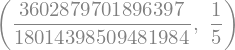

In [44]:
sympy.Rational(0.2), sympy.Rational('0.2')

### Constants and special symbols

> $\displaystyle \gamma = \lim_{n \to \infty} \left( \sum_{k=1}^n \frac{1}{k} -\ln n\right)$

In [45]:
[sympy.pi, sympy.E, sympy.EulerGamma, sympy.I, sympy.oo]

### Functions

In [46]:
x, y, z = sympy.symbols('x, y, z')

In [47]:
f = sympy.Function('f')
type(f)

sympy.core.function.UndefinedFunction

In [48]:
f(x)

In [49]:
g = sympy.Function('g')(x, y, z)
g

In [50]:
g.free_symbols

---

In [51]:
sympy.sin

sin

In [52]:
sympy.sin(x)

In [53]:
sympy.sin(pi * 1.5)

In [54]:
n = sympy.Symbol('n', integer=True)

In [55]:
sympy.sin(pi * n)

In [56]:
h = sympy.Lambda(x, x**2); h

In [57]:
h(5)

In [58]:
h(1 + x)

## Expressions

In [59]:
x = sympy.Symbol('x')

In [60]:
expr = 1 +2*x**2 +3*x**3; expr

In [61]:
expr.args

In [62]:
expr.args[2]

In [63]:
expr.args[2].args

In [64]:
expr.args[2].args[1]

In [65]:
expr.args[2].args[1].args

In [66]:
expr.args[2].args[1].args[1]

In [67]:
expr.args[2].args[1].args[1].args

## Manipulating expressions

### Simlification

In [68]:
expr = 2 * (x**2 - x) - x * (x + 1); expr

In [69]:
sympy.simplify(expr)

In [70]:
expr.simplify()

In [71]:
expr

---

In [72]:
expr = 2 * sympy.cos(x) * sympy.sin(x); expr

In [73]:
sympy.simplify(expr)

In [74]:
expr = sympy.exp(x) * sympy.exp(y); expr

In [75]:
sympy.simplify(expr)

### Expand

In [76]:
expr = (x + 1) * (x + 2); expr

In [77]:
expr.expand()

---

In [78]:
sympy.sin(x + y).expand(trig=True)

---

In [79]:
a, b = sympy.symbols('a, b', positive=True)

In [80]:
sympy.log(a * b).expand(log=True)

---

In [81]:
sympy.exp(I*a + b).expand(complex=True)

---

In [82]:
sympy.expand((a * b)**x, power_base=True)

---

In [83]:
sympy.exp(I*(a -b)*x).expand(power_exp=True)

### Factor, collect and combine

In [84]:
sympy.factor(x**2 - 1)

In [85]:
sympy.factor(x *sympy.cos(y) + x *sympy.sin(z))

---

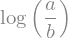

In [86]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

In [87]:
expr = x + y + x * y * z; expr

In [88]:
expr.collect(x)

In [89]:
expr.collect(y)

In [90]:
expr = sympy.cos(x + y) + sympy.sin(x - y)

In [91]:
expr1 = expr.expand(trig=True)
expr1

In [92]:
expr2 = expr1.collect([sympy.cos(x), sympy.sin(x)])
expr2

In [93]:
expr3 = expr2.collect(sympy.cos(y) - sympy.sin(y))
expr3

### Apart, together, and cancel

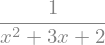

In [94]:
expr1 = 1/(x**2 + 3*x + 2); expr1

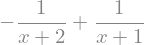

In [95]:
sympy.apart(expr1, x)

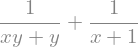

In [96]:
expr2 = 1 / (y * x + y) + 1 / (1+x); expr2

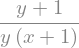

In [97]:
sympy.together(expr2)

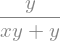

In [98]:
expr3 = y / (y * x + y); expr3

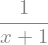

In [99]:
sympy.cancel(expr3)

### Substitutions

In [100]:
(x + y).subs(x, y)

In [101]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

---

In [102]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

---

In [103]:
expr = x * y + z**2 *x; expr

In [104]:
values = {x: 1.25, y: 0.4, z: 3.2}

In [105]:
expr.subs(values)

## Numerical evaluation

In [106]:
sympy.N(1 + pi)

In [107]:
sympy.N(pi, 50)

---

In [108]:
(x + 1/pi).evalf(10)

---

In [109]:
expr = sympy.sin(pi * x * sympy.exp(x)); expr

In [110]:
[expr.subs(x, i).evalf(3) for i in range(0, 10)]  # rather slow

---

In [111]:
expr_func = sympy.lambdify(x, expr)

In [112]:
expr_func(1.0)

---

In [113]:
import numpy as np

In [114]:
expr_func = sympy.lambdify(x, expr, 'numpy')

In [115]:
xvalues = np.arange(0, 10)

In [116]:
expr_func(xvalues)  # efficient method

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

## Calculus

### Derivatives

In [117]:
f = sympy.Function('f')(x)

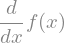

In [118]:
sympy.diff(f, x)  # equivalent to f.diff(x)

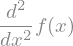

In [119]:
sympy.diff(f, x, x)

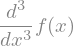

In [120]:
sympy.diff(f, x, 3)  # equivalent to sympy.diff(f, x, x, x)

In [121]:
g = sympy.Function('g')(x, y)

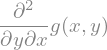

In [122]:
g.diff(x, y) # equivalent to sympy.diff(g, x, y)

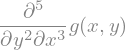

In [123]:
g.diff(x, 3, y, 2) # equivalent to sympy.diff(g, x, x, x, y, y)

---

In [124]:
expr = x**4 + x**3 + x**2 + x + 1; expr

In [125]:
expr.diff(x)

In [126]:
expr.diff(x, x)

---

In [127]:
expr = (x + 1)**3 * y ** 2 * (z - 1); expr

In [128]:
expr.diff(x, y, z)

---

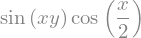

In [129]:
expr = sympy.sin(x * y) * sympy.cos(x / 2); expr

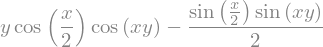

In [130]:
expr.diff(x)

---

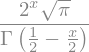

In [131]:
expr = sympy.functions.special.polynomials.hermite(x, 0); expr

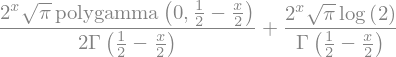

In [132]:
expr.diff(x)

---

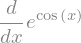

In [133]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x); d

In [134]:
d.doit()

### Integrals

In [135]:
a, b, x, y = sympy.symbols('a, b, x, y')

In [136]:
f = sympy.Function('f')(x)

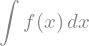

In [137]:
sympy.integrate(f)

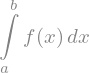

In [138]:
sympy.integrate(f, (x, a, b))

---

In [139]:
sympy.integrate(sympy.sin(x))

In [140]:
sympy.integrate(sympy.sin(x), (x, a, b))

In [141]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

In [142]:
a, b, c = sympy.symbols('a, b, c', positive=True)

In [143]:
sympy.integrate(a * sympy.exp(-((x -b)/c)**2), (x, -oo, oo))

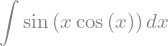

In [144]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

---

In [145]:
expr = sympy.sin(x*sympy.exp(y)); expr

In [146]:
sympy.integrate(expr, x)

In [147]:
expr = (x + y)**2; expr

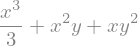

In [148]:
sympy.integrate(expr, x)

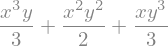

In [149]:
sympy.integrate(expr, x, y)

In [150]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

### Series

In [151]:
 sympy.limit(sympy.sin(x) / x, x, 0)

---

In [152]:
f = sympy.Function('f')

In [153]:
x, h = sympy.symbols('x, h')
diff_limit = (f(x + h) - f(x)) / h

In [154]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

In [155]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

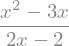

In [156]:
expr = (x**2 - 3*x) / (2*x - 2); expr

In [157]:
p = sympy.limit(expr/x, x, sympy.oo)

In [158]:
q = sympy.limit(expr - p*x, x, sympy.oo)

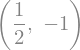

In [159]:
p, q

### Sums and products

In [160]:
n = sympy.symbols('n', integer=True)

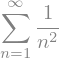

In [161]:
x = sympy.Sum(1/(n**2), (n, 1, oo)); x

In [162]:
x.doit()

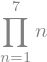

In [163]:
x = sympy.Product(n, (n, 1, 7)); x

In [164]:
x.doit()

---

In [165]:
x = sympy.Symbol('x')

In [166]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()

## Equations

In [167]:
x = sympy.Symbol('x')

In [168]:
sympy.solve(x**2 +2*x -3)

---

In [169]:
a, b, c = sympy.symbols('a, b, c')

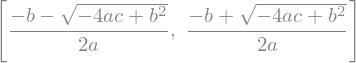

In [170]:
sympy.solve(a *x**2 +b *x +c, x)

In [171]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

The value of `LambertW` function $W(z)$ is such that $z = W(z)\exp(W(z))$ for any complex number $z$

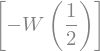

In [172]:
sympy.solve(sympy.exp(x) + 2 *x, x)

In [173]:
-sympy.LambertW(1/2)

---

In [174]:
sympy.solve(x**5 - x**2 + 1, x)

In [175]:
# NotImplementedError
# sympy.solve(sympy.tan(x) + x, x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation x + tan(x)

---

In [176]:
eq1 = x +2 *y -1 
eq2 = x -y +1

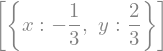

In [177]:
sympy.solve([eq1, eq2], [x, y], dict=True)

---

In [178]:
eq1 = x**2 -y
eq2 = y**2 -x

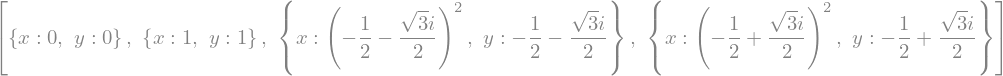

In [179]:
sols = sympy.solve([eq1, eq2], [x, y], dict=True); sols

In [180]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 for sol in sols]

[True, True, True, True]

## Linear algebra

In [181]:
sympy.Matrix([1, 2])

In [182]:
sympy.Matrix([[1, 2]])

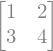

In [183]:
sympy.Matrix([[1, 2], [3, 4]])

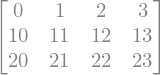

In [184]:
sympy.Matrix(3, 4, lambda m, n: 10 * m + n)

In [185]:
a, b, c, d = sympy.symbols('a, b, c, d')

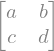

In [186]:
M = sympy.Matrix([[a, b], [c, d]]); M

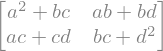

In [187]:
M * M  # Matrix multiplication

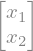

In [188]:
x = sympy.Matrix(sympy.symbols('x_1, x_2')); x

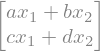

In [189]:
M * x

---

In [190]:
p, q = sympy.symbols('p, q')

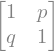

In [191]:
M = sympy.Matrix([[1, p], [q, 1]]); M

In [192]:
b = sympy.Matrix(sympy.symbols('b_1, b_2')); b

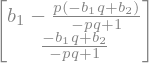

In [193]:
x = M.LUsolve(b); x

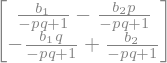

In [194]:
x = M.inv() *b; x

## ODE

In [195]:
x = sympy.Symbol('x')
f = sympy.Function('f')

In [196]:
sympy.dsolve(sympy.Derivative(f(x), x, x) +9 *f(x), f(x))

---

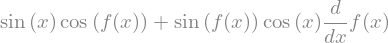

In [197]:
eq = sympy.sin(x) *sympy.cos(f(x)) + sympy.cos(x) *sympy.sin(f(x))*f(x).diff(x); eq

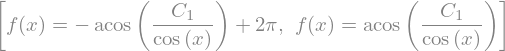

In [198]:
sympy.dsolve(eq, hint='1st_exact')

In [199]:
t = sympy.symbols('t')
x, y = sympy.Function('x'), sympy.Function('y')

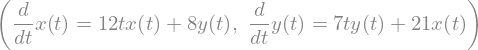

In [200]:
eq = (sympy.Eq(sympy.Derivative(x(t),t), 12*t*x(t) + 8*y(t)), sympy.Eq(sympy.Derivative(y(t),t), 21*x(t) + 7*t*y(t))); eq

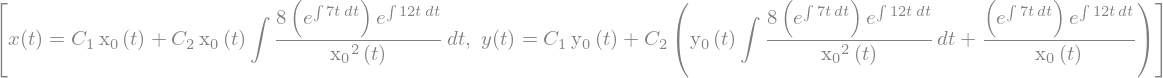

In [201]:
sympy.dsolve(eq)

---

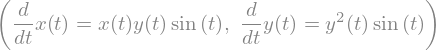

In [202]:
eq = (sympy.Eq(sympy.Derivative(x(t),t), x(t)*y(t)*sympy.sin(t)), sympy.Eq(sympy.Derivative(y(t),t),y(t)**2*sympy.sin(t))); eq


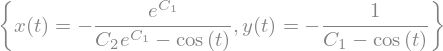

In [203]:
sympy.dsolve(eq)

## Plot

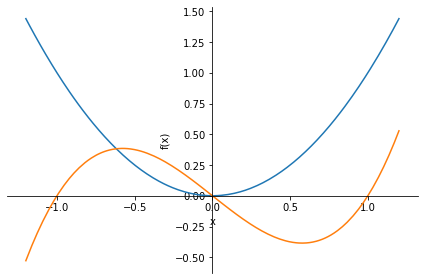

In [204]:
from sympy.plotting import plot

x = sympy.symbols('x')
p1 = plot(x**2, (x - 1) * x * (x + 1), (x, -1.2, 1.2))

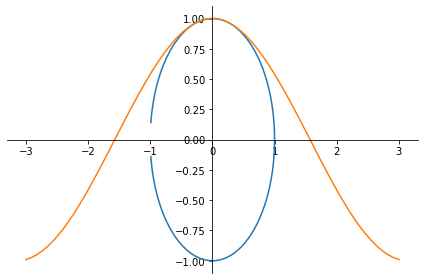

In [205]:
from sympy.plotting import plot_parametric

u = sympy.symbols('u')
p2 = plot_parametric((sympy.cos(u), sympy.sin(u)), (u, sympy.cos(u)), (u, -3, 3))

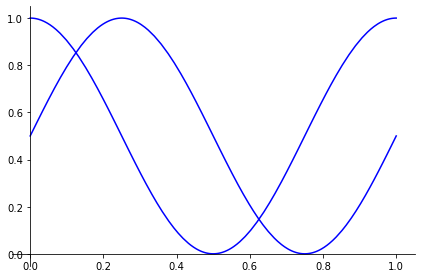

In [206]:
expr1 = (u, sympy.cos(2*pi*u)/2 + 1/2)
expr2 = (u, sympy.sin(2*pi*u)/2 + 1/2)

p3 = plot_parametric(expr1, expr2, (u, 0, 1), line_color='blue')

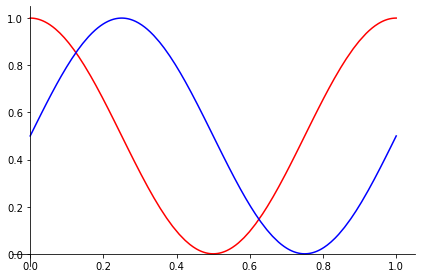

In [207]:
p3[0].line_color = 'red'
p3.show()

---

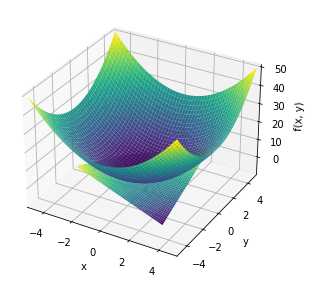

In [208]:
from sympy.plotting import plot3d

x, y = sympy.symbols('x y')
p4 = plot3d((x**2 + y**2, (x, -5, 5), (y, -5, 5)),
    (x*y, (x, -3, 3), (y, -3, 3)))

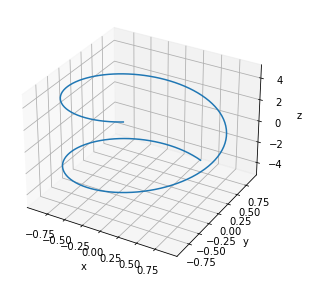

In [209]:
from sympy.plotting import plot3d_parametric_line

u = sympy.symbols('u')
p5 = plot3d_parametric_line(sympy.cos(u), sympy.sin(u), u, (u, -5, 5))

---

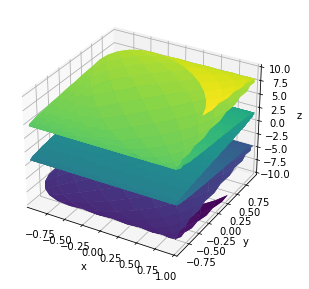

In [210]:
from sympy.plotting import plot3d_parametric_surface

u, v = sympy.symbols('u v')
p6 = plot3d_parametric_surface(sympy.cos(u + v), 
    sympy.sin(u - v), u - v, (u, -5, 5), (v, -5, 5))

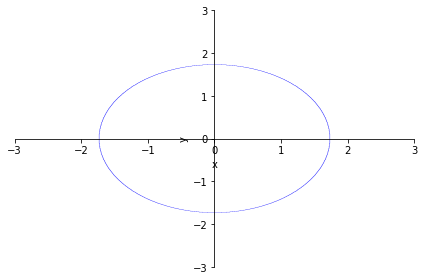

In [211]:
from sympy import plot_implicit, Eq, And

p7 = plot_implicit(
    Eq(x**2 + y**2, 3), (x, -3, 3), (y, -3, 3))

---

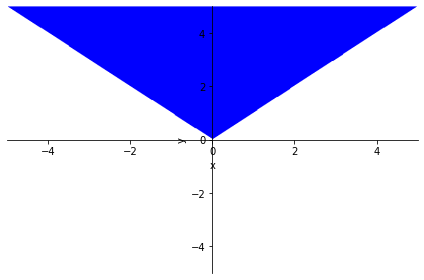

In [212]:
p8 = plot_implicit(And(y > x, y > -x))

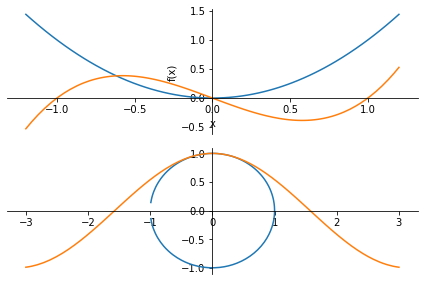

In [213]:
from sympy.plotting import PlotGrid

p9 = PlotGrid(2, 1, p1, p2)

## Versions

In [214]:
print("numpy: ", np.__version__)
print("sympy: ", sympy.__version__)

numpy:  1.20.3
sympy:  1.10.1
